In [1]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler 
import numpy as np

from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.decomposition import PCA

from sklearn.manifold import TSNE, Isomap

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score, rand_score, make_scorer, calinski_harabasz_score

In [2]:
data = pd.read_csv('energy_task.csv')

In [3]:
data.isna().sum()

Unnamed: 0     0
date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
dtype: int64

In [6]:
data.drop(['date'],axis=1, inplace=True)
data.drop(['Unnamed: 0'],axis=1, inplace=True)
for i in data:
    data[i]=data[i].astype('float32')
data.head(20)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60.0,30.0,19.889999,47.596668,19.200001,28.620720,19.790001,44.730000,19.000000,42.293976,...,16.808689,48.900002,16.571674,41.861050,-4.619329,732.602966,71.936852,7.000000,37.123405,5.30
1,60.0,30.0,19.889999,46.693333,19.200001,28.861351,19.790001,44.790001,19.000000,36.919468,...,17.068390,48.863335,15.492958,38.708912,-1.670169,732.653992,50.746731,6.666667,35.618649,5.20
2,50.0,30.0,19.889999,46.299999,19.200001,35.899612,19.790001,44.933334,18.926666,37.772522,...,17.109308,48.730000,15.938634,34.667011,6.237663,732.810791,45.204235,6.333333,22.968891,5.10
3,50.0,40.0,19.889999,46.066666,19.200001,29.383631,19.790001,45.000000,18.889999,31.062973,...,16.593687,48.590000,16.090782,29.634859,2.595815,733.747192,38.497044,6.000000,51.371346,5.00
4,60.0,40.0,19.889999,46.333332,19.200001,27.491932,19.790001,45.000000,18.889999,41.433857,...,16.091179,48.590000,15.841771,32.670704,5.559244,729.105896,83.547691,5.666667,9.734299,4.90
5,50.0,40.0,19.889999,46.026669,19.200001,30.938850,19.790001,44.933334,18.889999,31.468710,...,17.392471,48.590000,15.979031,43.905926,0.788829,732.068665,72.466255,5.333333,38.815071,4.80
6,60.0,50.0,19.889999,45.766666,19.200001,21.780989,19.790001,44.900002,18.889999,31.513210,...,16.587162,48.590000,15.942733,34.008022,0.374668,733.973328,70.275940,5.000000,6.033062,4.70
7,60.0,50.0,19.856667,45.560001,19.200001,27.271307,19.730000,44.900002,18.889999,39.397873,...,16.779341,48.590000,16.454977,31.946426,-3.612215,733.703003,63.975845,5.166667,28.473097,4.68
8,60.0,40.0,19.790001,45.597500,19.200001,29.032480,19.730000,44.790001,18.889999,38.914272,...,16.168396,48.590000,16.519789,45.090858,-2.636771,729.496216,48.672260,5.333333,8.549249,4.67
9,70.0,40.0,19.856667,46.090000,19.230000,26.925550,19.790001,44.863335,18.889999,31.994505,...,18.038462,48.590000,15.559463,39.540989,5.741721,734.037048,78.918205,5.500000,30.411636,4.65


In [7]:
data = data.sort_values(by='Appliances', ascending=False)
data.shape

(19735, 26)

In [8]:
X = data.drop(['Appliances'], axis=1)
y = data['Appliances']
X.shape, y.shape

((19735, 25), (19735,))

In [9]:
def test(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
  bag = BaggingRegressor().fit(X_train, y_train)
  print("R2: ", r2_score(y_test, bag.predict(X_test)))
  print("MAE: ", mean_absolute_error(y_test, bag.predict(X_test)))
  print("MSE: ", mean_squared_error(y_test, bag.predict(X_test)))

In [10]:
np.random.seed(42)
test(X, y)

R2:  -54.10913980564251
MAE:  38.22391084093212
MSE:  2753.747044917258


## Отбор признаков

### 1.1 Отбираем признаки с высокой дисперсией (VarianceThreshold)

In [11]:
X.describe()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,3.801875,21.686573,40.259739,20.341219,30.331137,22.267611,39.242504,20.855337,33.568119,19.592106,...,19.043627,42.936165,17.239206,35.251049,1.347536,742.277893,52.030838,4.039752,19.579884,3.760994
std,7.935987,1.606066,3.979299,2.192973,6.462960,2.006110,3.254576,2.042885,4.122638,1.844623,...,2.094572,5.224361,1.743332,4.315985,4.880904,8.888781,18.293139,2.451221,12.851277,4.195248
min,0.000000,16.790001,27.023333,16.100000,20.002975,17.200001,28.766666,15.100000,27.692007,15.330000,...,16.000423,29.600000,14.918222,29.000458,-5.000000,729.000061,24.000000,0.000000,1.000000,-6.600000
25%,0.000000,20.760000,37.333332,18.790001,24.885072,20.790001,36.900002,19.530001,30.328804,18.277500,...,17.289323,39.066666,15.867219,31.742911,-2.490934,734.854248,36.636662,2.000000,9.189829,0.900000
50%,0.000000,21.600000,39.656666,20.000000,29.885672,22.100000,38.529999,20.666666,32.745621,19.389999,...,18.740894,42.375000,16.870386,34.649933,0.407730,741.149475,49.769745,3.666667,17.765018,3.430000
75%,0.000000,22.600000,43.066666,21.500000,35.126249,23.290001,41.759998,22.100000,35.916435,20.619643,...,20.488546,46.535999,18.207531,37.936226,4.054688,748.624115,65.927776,5.500000,27.853999,6.570000
max,70.000000,26.260000,63.360001,29.856667,55.774170,29.236000,50.163334,26.200001,50.875980,25.795000,...,26.932396,58.779999,24.488386,52.469727,25.957954,771.496155,99.777145,14.000000,64.720505,15.500000


In [12]:
vt = VarianceThreshold(2)
X_vt = vt.fit_transform(X)
X_vt.shape

(19735, 25)

In [13]:
X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
X_vt.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,30.0,21.930000,42.766666,21.040001,22.964373,20.700001,40.633335,20.889999,36.307449,18.889999,...,20.291027,42.663334,16.599197,32.471931,1.834362,751.801636,49.368221,3.666667,36.322639,-0.0833
1,30.0,19.600000,34.299999,18.426666,27.852140,18.389999,36.930000,17.700001,31.890450,17.856667,...,16.029028,37.429443,15.705376,36.585258,-3.153581,731.679932,74.189598,1.000000,21.386610,-3.2200
2,0.0,21.463333,41.693333,20.856667,37.975391,21.666666,43.930000,18.700001,35.675442,17.100000,...,16.190033,45.590000,16.138798,36.688366,2.997110,744.039612,34.843586,7.000000,29.707657,0.7000
3,0.0,23.000000,43.166668,22.200001,33.622875,26.100000,38.930000,21.600000,40.226322,20.889999,...,19.409576,42.526669,16.526796,33.282104,14.577109,739.645508,46.231991,7.000000,39.784714,7.0000
4,20.0,19.730000,37.863335,18.566668,21.370199,18.389999,36.863335,17.600000,29.039257,17.867777,...,17.260490,37.228889,15.038372,34.026581,-1.672032,761.569397,45.693497,1.000000,47.723896,-3.2000


In [14]:
test(X_vt, y)

R2:  -54.387455038278965
MAE:  38.77203647416413
MSE:  2767.6541708882132


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,3.301264,0.151572,0.630008,0.318654,-1.139873,-0.781438,0.427358,0.016969,0.664477,-0.380633,...,0.595554,-0.052224,-0.367127,-0.643929,0.099743,1.071459,-0.145557,-0.152208,1.302842,-0.916368
1,3.301264,-1.299215,-1.497724,-0.873062,-0.383580,-1.932949,-0.710556,-1.544588,-0.406951,-0.940834,...,-1.439280,-1.054074,-0.879849,0.309140,-0.922212,-1.192317,1.211346,-1.240129,0.140591,-1.664067
2,-0.479080,-0.139001,0.360272,0.235051,1.182809,-0.299565,1.440316,-1.055071,0.511171,-1.351045,...,-1.362410,0.507986,-0.631226,0.333030,0.337973,0.198199,-0.939570,1.207694,0.788095,-0.729652
3,-0.479080,0.817813,0.730531,0.847629,0.509337,1.910406,-0.096021,0.364526,1.615075,0.703627,...,0.174718,-0.078384,-0.408659,-0.456210,2.710544,-0.296156,-0.317004,1.207694,1.572244,0.772085
4,2.041149,-1.218270,-0.602233,-0.809220,-1.386542,-1.932949,-0.731040,-1.593539,-1.098563,-0.934811,...,-0.851335,-1.092463,-1.262462,-0.283713,-0.618665,2.170374,-0.346442,-1.240129,2.190033,-1.659299


In [16]:
vt = VarianceThreshold(1)
X_vt = vt.fit_transform(X_scaled)
print(X_vt.shape)
test(X_vt, y)

(19735, 14)
R2:  -87.9168877583125
MAE:  51.627152988855116
MSE:  4443.08544410672


### 1.2 Одномерный отбор признаков (SelectKBest)

In [17]:
skb = SelectKBest(k=6)
X_skb = skb.fit_transform(X, y)
test(X_skb, y)

R2:  -53.350483937726715
MAE:  36.58405632042917
MSE:  2715.837791356955


In [18]:
X_skb = pd.DataFrame(X_skb, columns=skb.get_feature_names_out())
X_skb

,lights,T1,T2,T3,T4,T5
0,30.0,21.930000,21.040001,20.700001,20.889999,18.889999
1,30.0,19.600000,18.426666,18.389999,17.700001,17.856667
2,0.0,21.463333,20.856667,21.666666,18.700001,17.100000
3,0.0,23.000000,22.200001,26.100000,21.600000,20.889999
4,20.0,19.730000,18.566668,18.389999,17.600000,17.867777
...,...,...,...,...,...,...
19730,0.0,19.230000,17.790001,19.700001,18.600000,17.100000
19731,0.0,19.000000,18.290001,19.730000,18.000000,17.290001
19732,0.0,17.290001,16.290001,17.700001,15.300000,15.555555
19733,10.0,20.700001,19.389999,21.600000,19.389999,18.028572


### 1.3 Рекурсивный отбор признаков (RFE)

In [19]:
tree = DecisionTreeRegressor().fit(X, y)

In [20]:
rfe = RFE(estimator=tree, n_features_to_select=4, step=1).fit(X, y)
X_rfe = pd.DataFrame(rfe.transform(X), columns=rfe.get_feature_names_out())
X_rfe

,T2,RH_3,T6,RH_7
0,21.040001,40.633335,0.466667,37.184284
1,18.426666,36.930000,-1.600000,28.225000
2,20.856667,43.930000,4.966667,38.529999
3,22.200001,38.930000,16.830000,36.466667
4,18.566668,36.863335,-1.730000,28.153889
...,...,...,...,...
19730,17.790001,40.567501,-4.905556,33.900002
19731,18.290001,45.400002,8.226666,44.893890
19732,16.290001,41.259998,6.400000,38.090000
19733,19.389999,41.919998,10.500000,42.566666


In [21]:
test(X_rfe, y)

R2:  -53.92218024087974
MAE:  38.2096251266464
MSE:  2744.4048677248675


### 1.4 Отбор признаков по их значимости

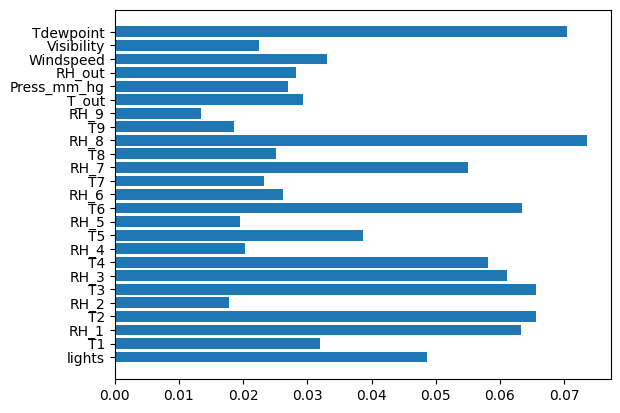

In [22]:
plt.barh(width=tree.feature_importances_, y=X.columns);

## 2. Выделение признаков

### 2.1 Метод главных компонент (PCA)

In [23]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)
X_pca.shape

(19735, 2)

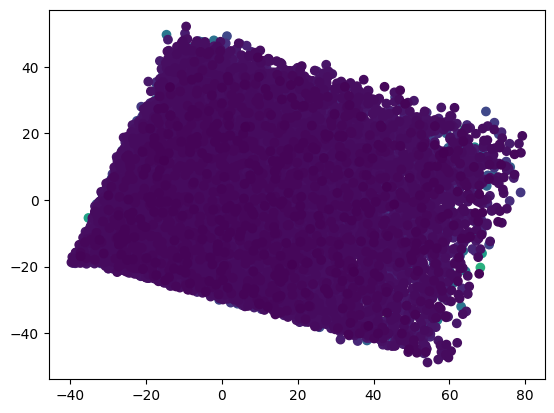

In [24]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y);

In [25]:
sum(pca.explained_variance_ratio_)

0.598751038312912

In [26]:
test(X_pca, y)

R2:  -178.6422128692133
MAE:  76.26646403242148
MSE:  8976.536643026006


In [27]:
pca_2 = PCA(n_components=3)
X_pca_2 = pca_2.fit_transform(X, y)

In [28]:
test(X_pca_2, y)

R2:  -160.6776029588218
MAE:  76.23741979061128
MSE:  8078.86355960824


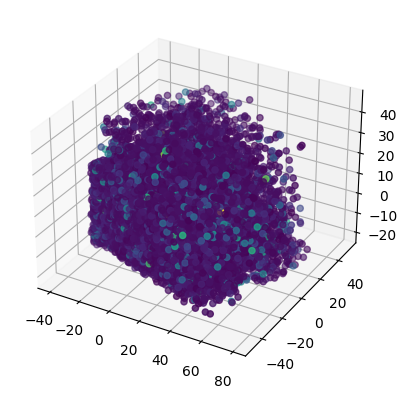

In [29]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_2[:,0], X_pca_2[:,1], X_pca_2[:,2], c=y);

### 2.2 Нелинейные методы выделения признаков (TSNE, Isomap)

In [30]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

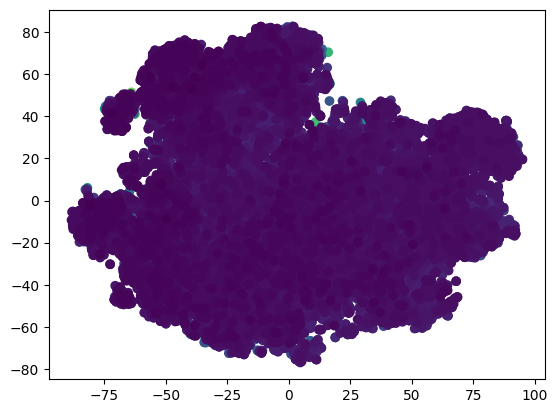

In [31]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y);

In [32]:
test(X_tsne, y)

R2:  -104.0405578766745
MAE:  52.33029381965552
MSE:  5248.7686592367445


In [33]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled)

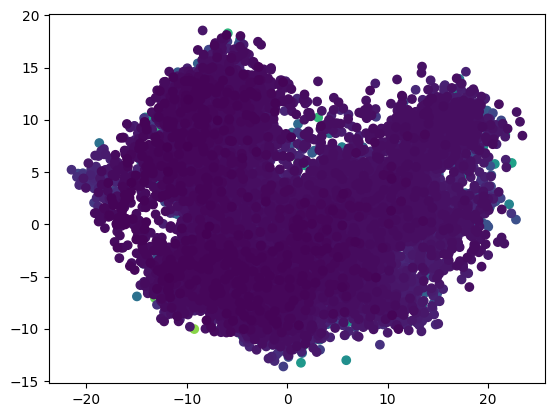

In [34]:
plt.scatter(X_isomap[:,0], X_isomap[:,1], c=y);

D:\environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


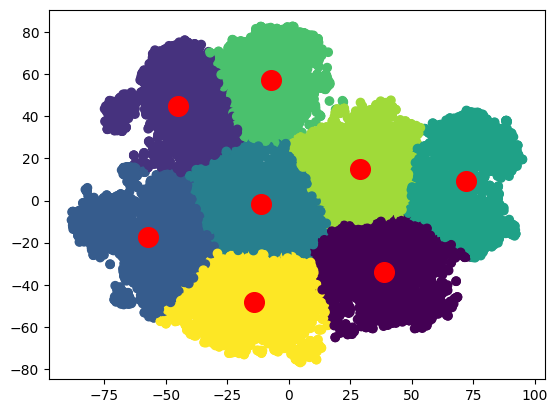

In [35]:
kmeans = KMeans(n_clusters=8).fit(X_tsne)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200);

In [36]:
silhouette_score(X_tsne, kmeans.labels_)

0.38292265

### Обучение

In [37]:
Y = y
X = X_skb
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [38]:
lr = LinearRegression().fit(X_train, Y_train)

In [39]:
y_pred = lr.predict(X_test)

In [40]:
print("R2: ", r2_score(Y_test, y_pred))
print("MAE: ", mean_absolute_error(Y_test, y_pred))
print("MSE: ", mean_squared_error(Y_test, y_pred))

R2:  0.08389192975331061
MAE:  56.396305
MSE:  9417.335
